In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
%matplotlib inline

In [154]:
df = pd.read_csv(r'Bond-VN.csv', index_col= 0,parse_dates=True)
df = df[['GGVF5Y','GGVF1Y','GGVF3Y','CPI','FER','Baserate','FIR','Stockreturn','Fiscal','Pubdebt','CurrentAcc']]


In [155]:
X = df.drop('GGVF5Y', axis=1)
y = df['GGVF5Y']

In [156]:
X

,GGVF1Y,GGVF3Y,CPI,FER,Baserate,FIR,Stockreturn,Fiscal,Pubdebt,CurrentAcc
Time,,,,,,,,,,
2006-07-01,0.06150,0.08190,0.368,13384067982,8.25,5.5000,-18.072499,1.22461,38.406899,-0.2
2006-08-01,0.06063,0.08142,0.381,13384067982,8.25,5.4375,16.280391,1.22461,38.406899,-0.2
2006-09-01,0.07600,0.08050,0.281,13384067982,8.25,5.3750,7.237673,1.22461,38.406899,-0.2
2006-10-01,0.07767,0.08100,0.280,13384067982,8.25,5.3750,-2.883830,1.22461,38.406899,-0.2
2006-11-01,0.07817,0.08133,0.572,13384067982,8.25,5.5000,23.753763,1.22461,38.406899,-0.2
...,...,...,...,...,...,...,...,...,...,...
2019-08-01,0.02800,0.03003,0.275,68812100000,9.00,2.2500,-0.766392,-4.40000,57.500000,2.2
2019-09-01,0.02729,0.03050,0.319,68812100000,9.00,2.2500,1.270248,-4.40000,57.500000,2.2
2019-10-01,0.02343,0.02560,0.583,68812100000,9.00,2.0000,0.226780,-4.40000,57.500000,2.2


In [157]:
from sklearn.model_selection import train_test_split
n_state = 50
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=n_state)

In [158]:
index_y = y_test.index
y_test_1 = y_test

In [159]:
y_test_1

Time
2019-07-01    0.036220
2013-03-01    0.085000
2011-01-01    0.114310
2008-06-01    0.203330
2017-10-01    0.046100
2009-10-01    0.102330
2012-07-01    0.098830
2007-07-01    0.075590
2017-06-01    0.049400
2019-04-01    0.039150
2011-06-01    0.126000
2012-10-01    0.102080
2016-06-01    0.061300
2015-12-01    0.066040
2014-09-01    0.054720
2010-07-01    0.105510
2013-09-01    0.086330
2016-04-01    0.063780
2016-12-01    0.056000
2011-04-01    0.124730
2007-11-01    0.086170
2009-11-01    0.111910
2018-01-01    0.034000
2008-08-01    0.164750
2017-04-01    0.053100
2014-10-01    0.051680
2008-03-01    0.087300
2018-07-01    0.038250
2012-11-01    0.098330
2019-09-01    0.030860
2009-05-01    0.091780
2009-09-01    0.101705
2018-05-01    0.035750
Name: GGVF5Y, dtype: float64

In [160]:
y_test = np.array(y_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)

In [161]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

X_test = sc_X.fit_transform(X_test)
y_test = sc_y.fit_transform(y_test)

In [162]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')

In [163]:
y_rbf = svr_rbf.fit(X_train, y_train)
y_rbf = y_rbf.predict(X_test)
y_rbf = sc_y.inverse_transform(y_rbf)

y_lin = svr_lin.fit(X_train, y_train)
y_lin = y_lin.predict(X_test)
y_lin = sc_y.inverse_transform(y_lin)

y_poly = svr_poly.fit(X_train, y_train)
y_poly = y_poly.predict(X_test)
y_poly = sc_y.inverse_transform(y_poly)

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [164]:
y_test = y_test.reshape(1,-1)

adj_y_test = []
for i in y_test:
    for j in i:
        adj_y_test.append(j)

adj_y_lin = []
for k in y_lin:
    adj_y_lin.append(k)

adj_y_rbf = []
for m in y_rbf:
    adj_y_rbf.append(m)

adj_y_poly = []
for p in y_poly:
    adj_y_poly.append(p)

In [165]:
y_test_1.sort_index()

Time
2007-07-01    0.075590
2007-11-01    0.086170
2008-03-01    0.087300
2008-06-01    0.203330
2008-08-01    0.164750
2009-05-01    0.091780
2009-09-01    0.101705
2009-10-01    0.102330
2009-11-01    0.111910
2010-07-01    0.105510
2011-01-01    0.114310
2011-04-01    0.124730
2011-06-01    0.126000
2012-07-01    0.098830
2012-10-01    0.102080
2012-11-01    0.098330
2013-03-01    0.085000
2013-09-01    0.086330
2014-09-01    0.054720
2014-10-01    0.051680
2015-12-01    0.066040
2016-04-01    0.063780
2016-06-01    0.061300
2016-12-01    0.056000
2017-04-01    0.053100
2017-06-01    0.049400
2017-10-01    0.046100
2018-01-01    0.034000
2018-05-01    0.035750
2018-07-01    0.038250
2019-04-01    0.039150
2019-07-01    0.036220
2019-09-01    0.030860
Name: GGVF5Y, dtype: float64

In [166]:
concatenate_frame = pd.DataFrame({'Real': y_test_1,
                                'RBF model':adj_y_rbf,
                                'Linear model':adj_y_lin,
                                'Polynomial model': adj_y_poly}, index= index_y)
concatenate_frame.sort_index(inplace=True)

In [167]:
concatenate_frame.sort_index(inplace=True)

In [168]:
concatenate_frame.to_excel('SVR.xlsx')

In [169]:
concatenate_frame

,Real,RBF model,Linear model,Polynomial model
Time,,,,
2007-07-01,0.075590,0.077715,0.072823,0.077805
2007-11-01,0.086170,0.081795,0.083116,0.093529
2008-03-01,0.087300,0.092978,0.084540,0.095190
2008-06-01,0.203330,0.122265,0.194892,0.316870
2008-08-01,0.164750,0.128861,0.167998,0.149069
2009-05-01,0.091780,0.097872,0.093895,0.105255
2009-09-01,0.101705,0.100533,0.099772,0.098001
2009-10-01,0.102330,0.100519,0.101898,0.100179
2009-11-01,0.111910,0.102446,0.109461,0.116078


In [170]:
concatenate_frame.describe()

,Real,RBF model,Linear model,Polynomial model
count,33.000000,33.000000,33.000000,33.000000
mean,0.081283,0.078108,0.081301,0.087938
std,0.039217,0.032553,0.038925,0.050211
min,0.030860,0.027390,0.031977,0.038201
25%,0.051680,0.049609,0.054345,0.060805
50%,0.085000,0.081795,0.083116,0.084777
75%,0.102080,0.101945,0.101898,0.098001
max,0.203330,0.133505,0.194892,0.316870


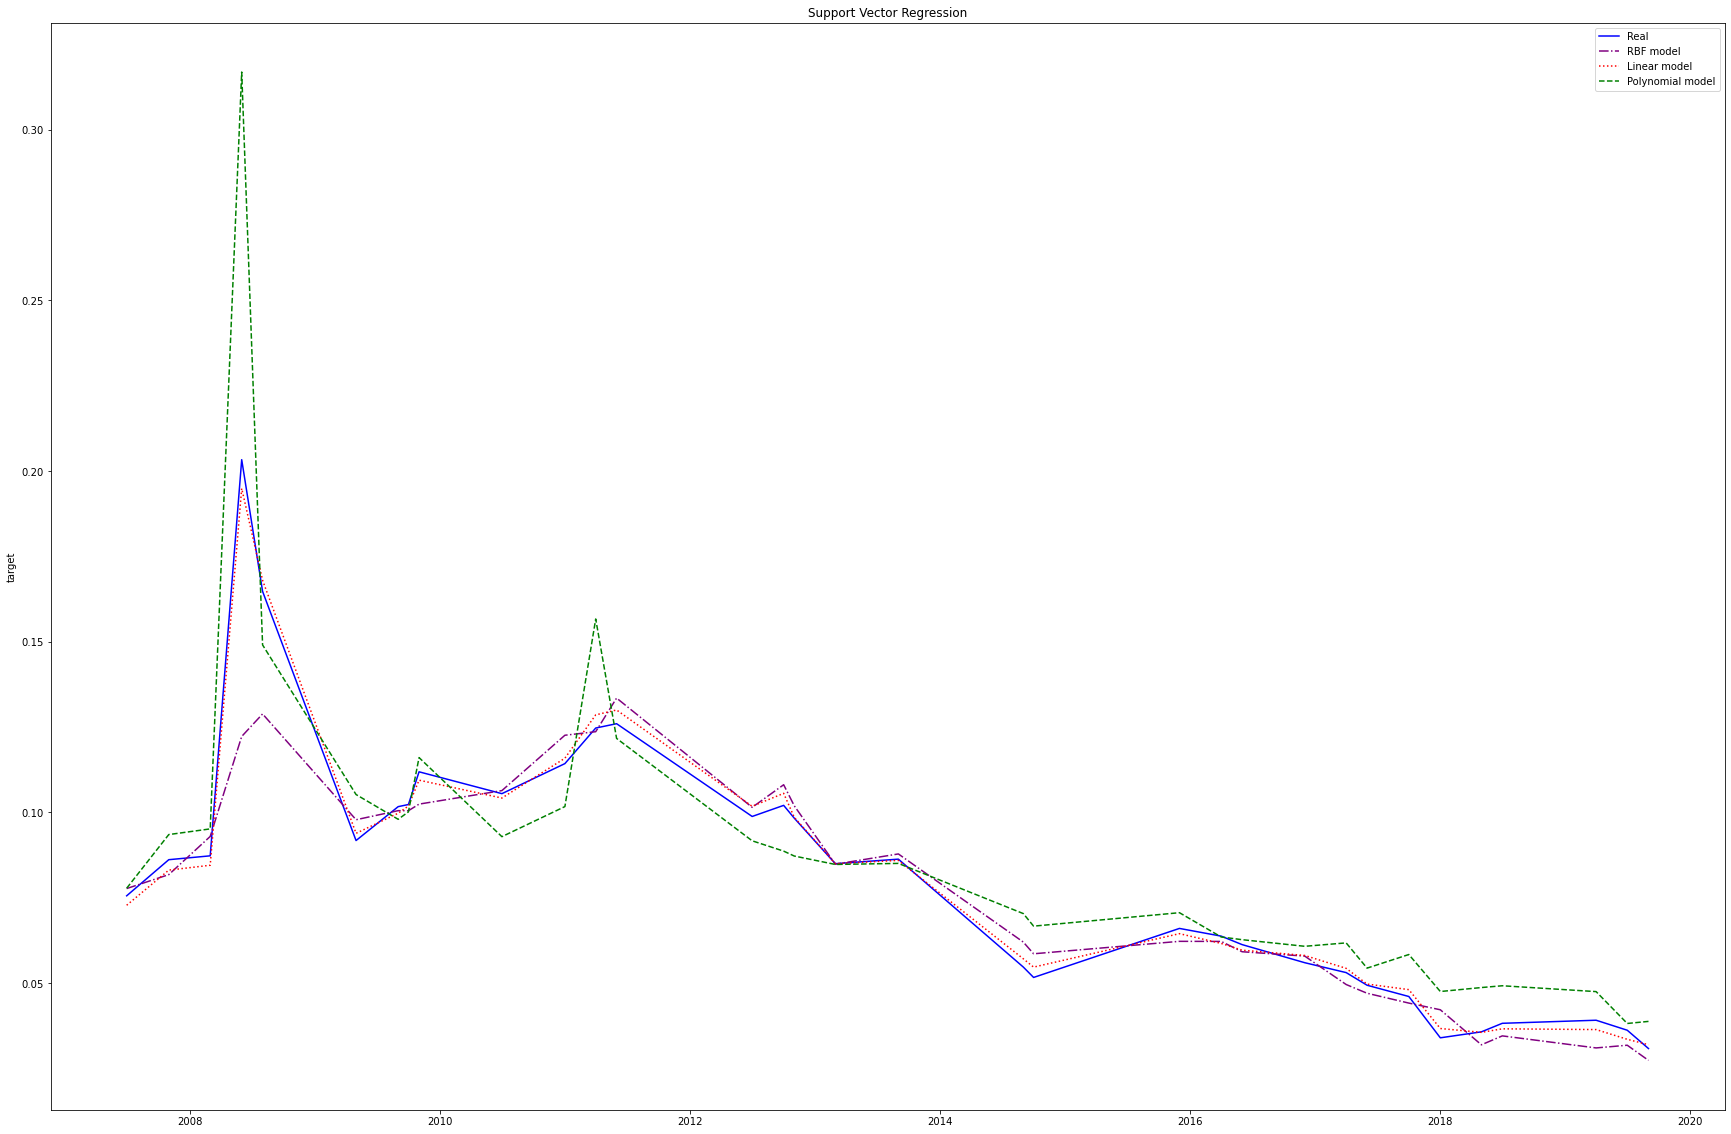

In [171]:
plt.figure(figsize=(30,20))

plt.plot(concatenate_frame.Real, color='blue',label='Real')
plt.plot(concatenate_frame['RBF model'], color='purple',linestyle ='dashdot',label='RBF model')
plt.plot(concatenate_frame['Linear model'], color='red',linestyle ='dotted', label='Linear model')
plt.plot(concatenate_frame['Polynomial model'], color='g',linestyle ='--', label='Polynomial model')

plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [172]:
rmse = np.sqrt(mean_squared_error(concatenate_frame.Real, concatenate_frame['RBF model']))
mae = mean_absolute_error(concatenate_frame.Real, concatenate_frame['RBF model'])
mape = (mean_absolute_percentage_error(concatenate_frame.Real, concatenate_frame['RBF model']))*100

In [173]:
print('RBF model:')
print(f'RMSE = {rmse}')
print(f'MAE  = {mae}')
print(f'MAPE = {round(mape,2)}%')


RBF model:
RMSE = 0.016118500526721122
MAE  = 0.007348213690088387
MAPE = 8.15%


In [174]:
rmse = np.sqrt(mean_squared_error(concatenate_frame.Real, concatenate_frame['Linear model']))
mae = mean_absolute_error(concatenate_frame.Real, concatenate_frame['Linear model'])
mape = (mean_absolute_percentage_error(concatenate_frame.Real, concatenate_frame['Linear model']))*100

In [175]:
print('Linear model:')
print(f'RMSE = {rmse}')
print(f'MAE  = {mae}')
print(f'MAPE = {round(mape,2)}%')


Linear model:
RMSE = 0.002685579623232457
MAE  = 0.0021972783542527413
MAPE = 3.02%


In [176]:
rmse = np.sqrt(mean_squared_error(concatenate_frame.Real, concatenate_frame['Polynomial model']))
mae = mean_absolute_error(concatenate_frame.Real, concatenate_frame['Polynomial model'])
mape = (mean_absolute_percentage_error(concatenate_frame.Real, concatenate_frame['Polynomial model']))*100

In [177]:
print('Polynomial model:')
print(f'RMSE = {rmse}')
print(f'MAE  = {mae}')
print(f'MAPE = {round(mape,2)}%')


Polynomial model:
RMSE = 0.022405914748616175
MAE  = 0.011767939898399051
MAPE = 14.61%
